In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
np.random.seed(42)

In [5]:
url = 'https://raw.githubusercontent.com/AayushWestcliff/datasets/refs/heads/main/data200/assignments/sales_data.csv'
df = pd.read_csv(url)

In [6]:
print("First 10 rows of the dataset:")
display(df.head(10))

First 10 rows of the dataset:


,Advertising_Spend,Region,Sales,Time_Period,Product_Category
0,43.708611,East,151.221290,1,B
1,95.564288,South,158.828662,2,A
2,75.879455,South,33.328037,3,A
3,63.879264,West,84.523831,4,A
4,24.041678,South,40.856431,5,C
5,24.039507,South,175.358617,6,C
6,15.227525,South,132.193663,7,B
7,87.955853,West,79.561644,8,C
8,64.100351,South,31.440503,9,A
9,73.726532,East,75.976818,10,B


In [7]:
df_dummies = pd.get_dummies(df, columns=['Region'], drop_first=True, dtype=int)

In [8]:
X = df_dummies[['Advertising_Spend'] + [col for col in df_dummies.columns if 'Region_' in col]]
y = df_dummies['Sales']

In [9]:
X = X.apply(pd.to_numeric, errors='coerce').dropna()
y = pd.to_numeric(y, errors='coerce').loc[X.index]

In [10]:
X = sm.add_constant(X)

In [11]:
X_np = np.asarray(X, dtype=float)
y_np = np.asarray(y, dtype=float)

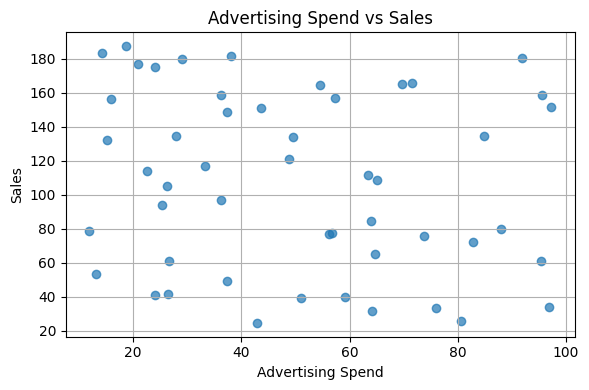

In [12]:
plt.figure(figsize=(6, 4))
plt.scatter(df['Advertising_Spend'], df['Sales'], alpha=0.7)
plt.title('Advertising Spend vs Sales')
plt.xlabel('Advertising Spend')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

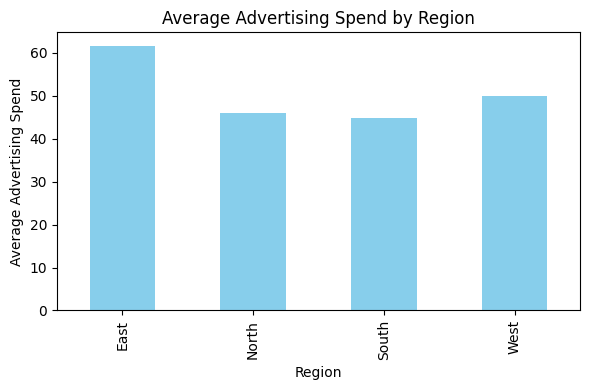

In [13]:
plt.figure(figsize=(6, 4))
df.groupby('Region')['Advertising_Spend'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Advertising Spend by Region')
plt.xlabel('Region')
plt.ylabel('Average Advertising Spend')
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

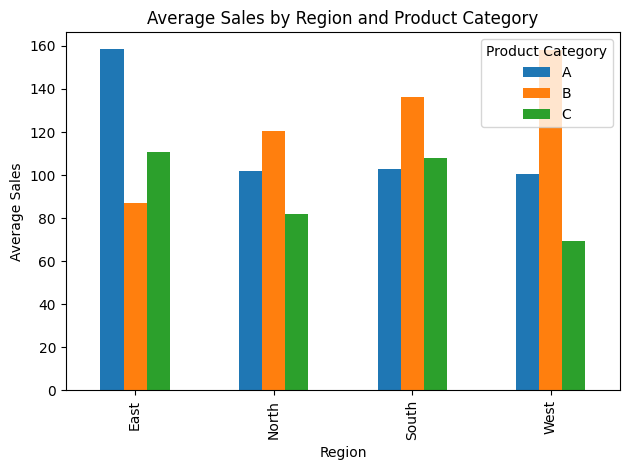

In [14]:
plt.figure(figsize=(8, 5))
df_grouped = df.groupby(['Region', 'Product_Category'])['Sales'].mean().unstack()
df_grouped.plot(kind='bar')
plt.title('Average Sales by Region and Product Category')
plt.xlabel('Region')
plt.ylabel('Average Sales')
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()

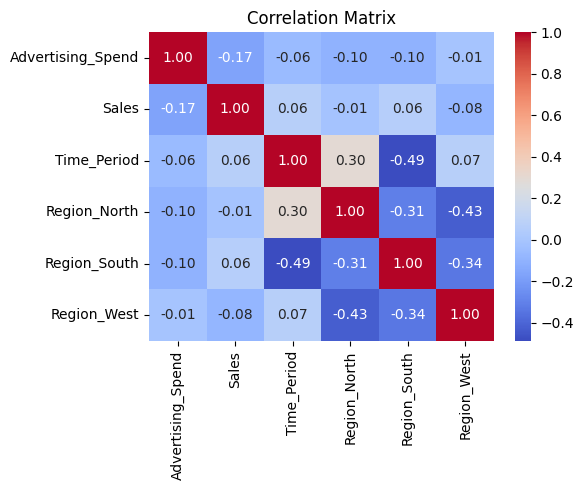

In [20]:
numeric_df = df_dummies.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [21]:
glm_model = sm.GLM(y_np, X_np, family=sm.families.Gaussian()).fit()

In [22]:
print("\nGLM Regression Summary:")
print(glm_model.summary())


GLM Regression Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   50
Model:                            GLM   Df Residuals:                       45
Model Family:                Gaussian   Df Model:                            4
Link Function:               Identity   Scale:                          2835.8
Method:                          IRLS   Log-Likelihood:                -267.06
Date:                Sun, 25 May 2025   Deviance:                   1.2761e+05
Time:                        11:19:52   Pearson chi2:                 1.28e+05
No. Iterations:                     3   Pseudo R-squ. (CS):            0.04596
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        136.7624     2